<a href="https://colab.research.google.com/github/Tetratic/MLA_BSJ/blob/main/FinalProject_Regression_BSJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Regression
### Brian Johnston
### CS430-ON
### Machine Learning in the Cloud

# Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Imports for Specific Models

In [22]:
from sklearn.linear_model import LinearRegression as linreg
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.model_selection import GridSearchCV

# Imports for Splitting Data and Building Pipeline

In [5]:
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline as plne
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer as ctrans
from sklearn.preprocessing import MinMaxScaler as mmscal
from sklearn.preprocessing import OneHotEncoder as ohe

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function

In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## ROC_Curve Function

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

# Problem 1

# Reading the Data

In [9]:
pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


# code copied from ucimlrepo, thanks to them

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

# Statistical and Visual Exploration

In [11]:
X.rename(columns={'Cement':'cement','Blast Furnace Slag':'blast_furnace_slag','Fly Ash':'fly_ash','Water':'water','Superplasticizer':'superplasticizer','Coarse Aggregate':'course_aggregate','Fine Aggregate':'fine_aggregate','Age':'age'},inplace=True)
y.rename(columns={'Concrete compressive strength':'concrete_compressive_strength'},inplace=True)

<ipython-input-11-5eba5230de1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'Cement':'cement','Blast Furnace Slag':'blast_furnace_slag','Fly Ash':'fly_ash','Water':'water','Superplasticizer':'superplasticizer','Coarse Aggregate':'course_aggregate','Fine Aggregate':'fine_aggregate','Age':'age'},inplace=True)
<ipython-input-11-5eba5230de1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={'Concrete compressive strength':'concrete_compressive_strength'},inplace=True)


In [12]:
X.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,course_aggregate,fine_aggregate,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [13]:
y.describe()

,concrete_compressive_strength
count,1030.000000
mean,35.817961
std,16.705742
min,2.330000
25%,23.710000
50%,34.445000
75%,46.135000
max,82.600000


<Axes: xlabel='Age (days)'>

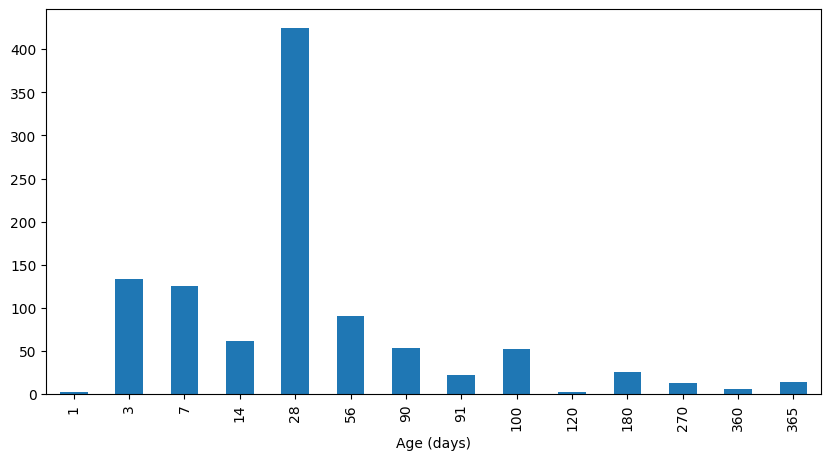

In [14]:
cem_age = pd.Series(X['age'].groupby(X['age']).count())
cem_age.plot(kind='bar',xlabel='Age (days)',figsize=(10,5))

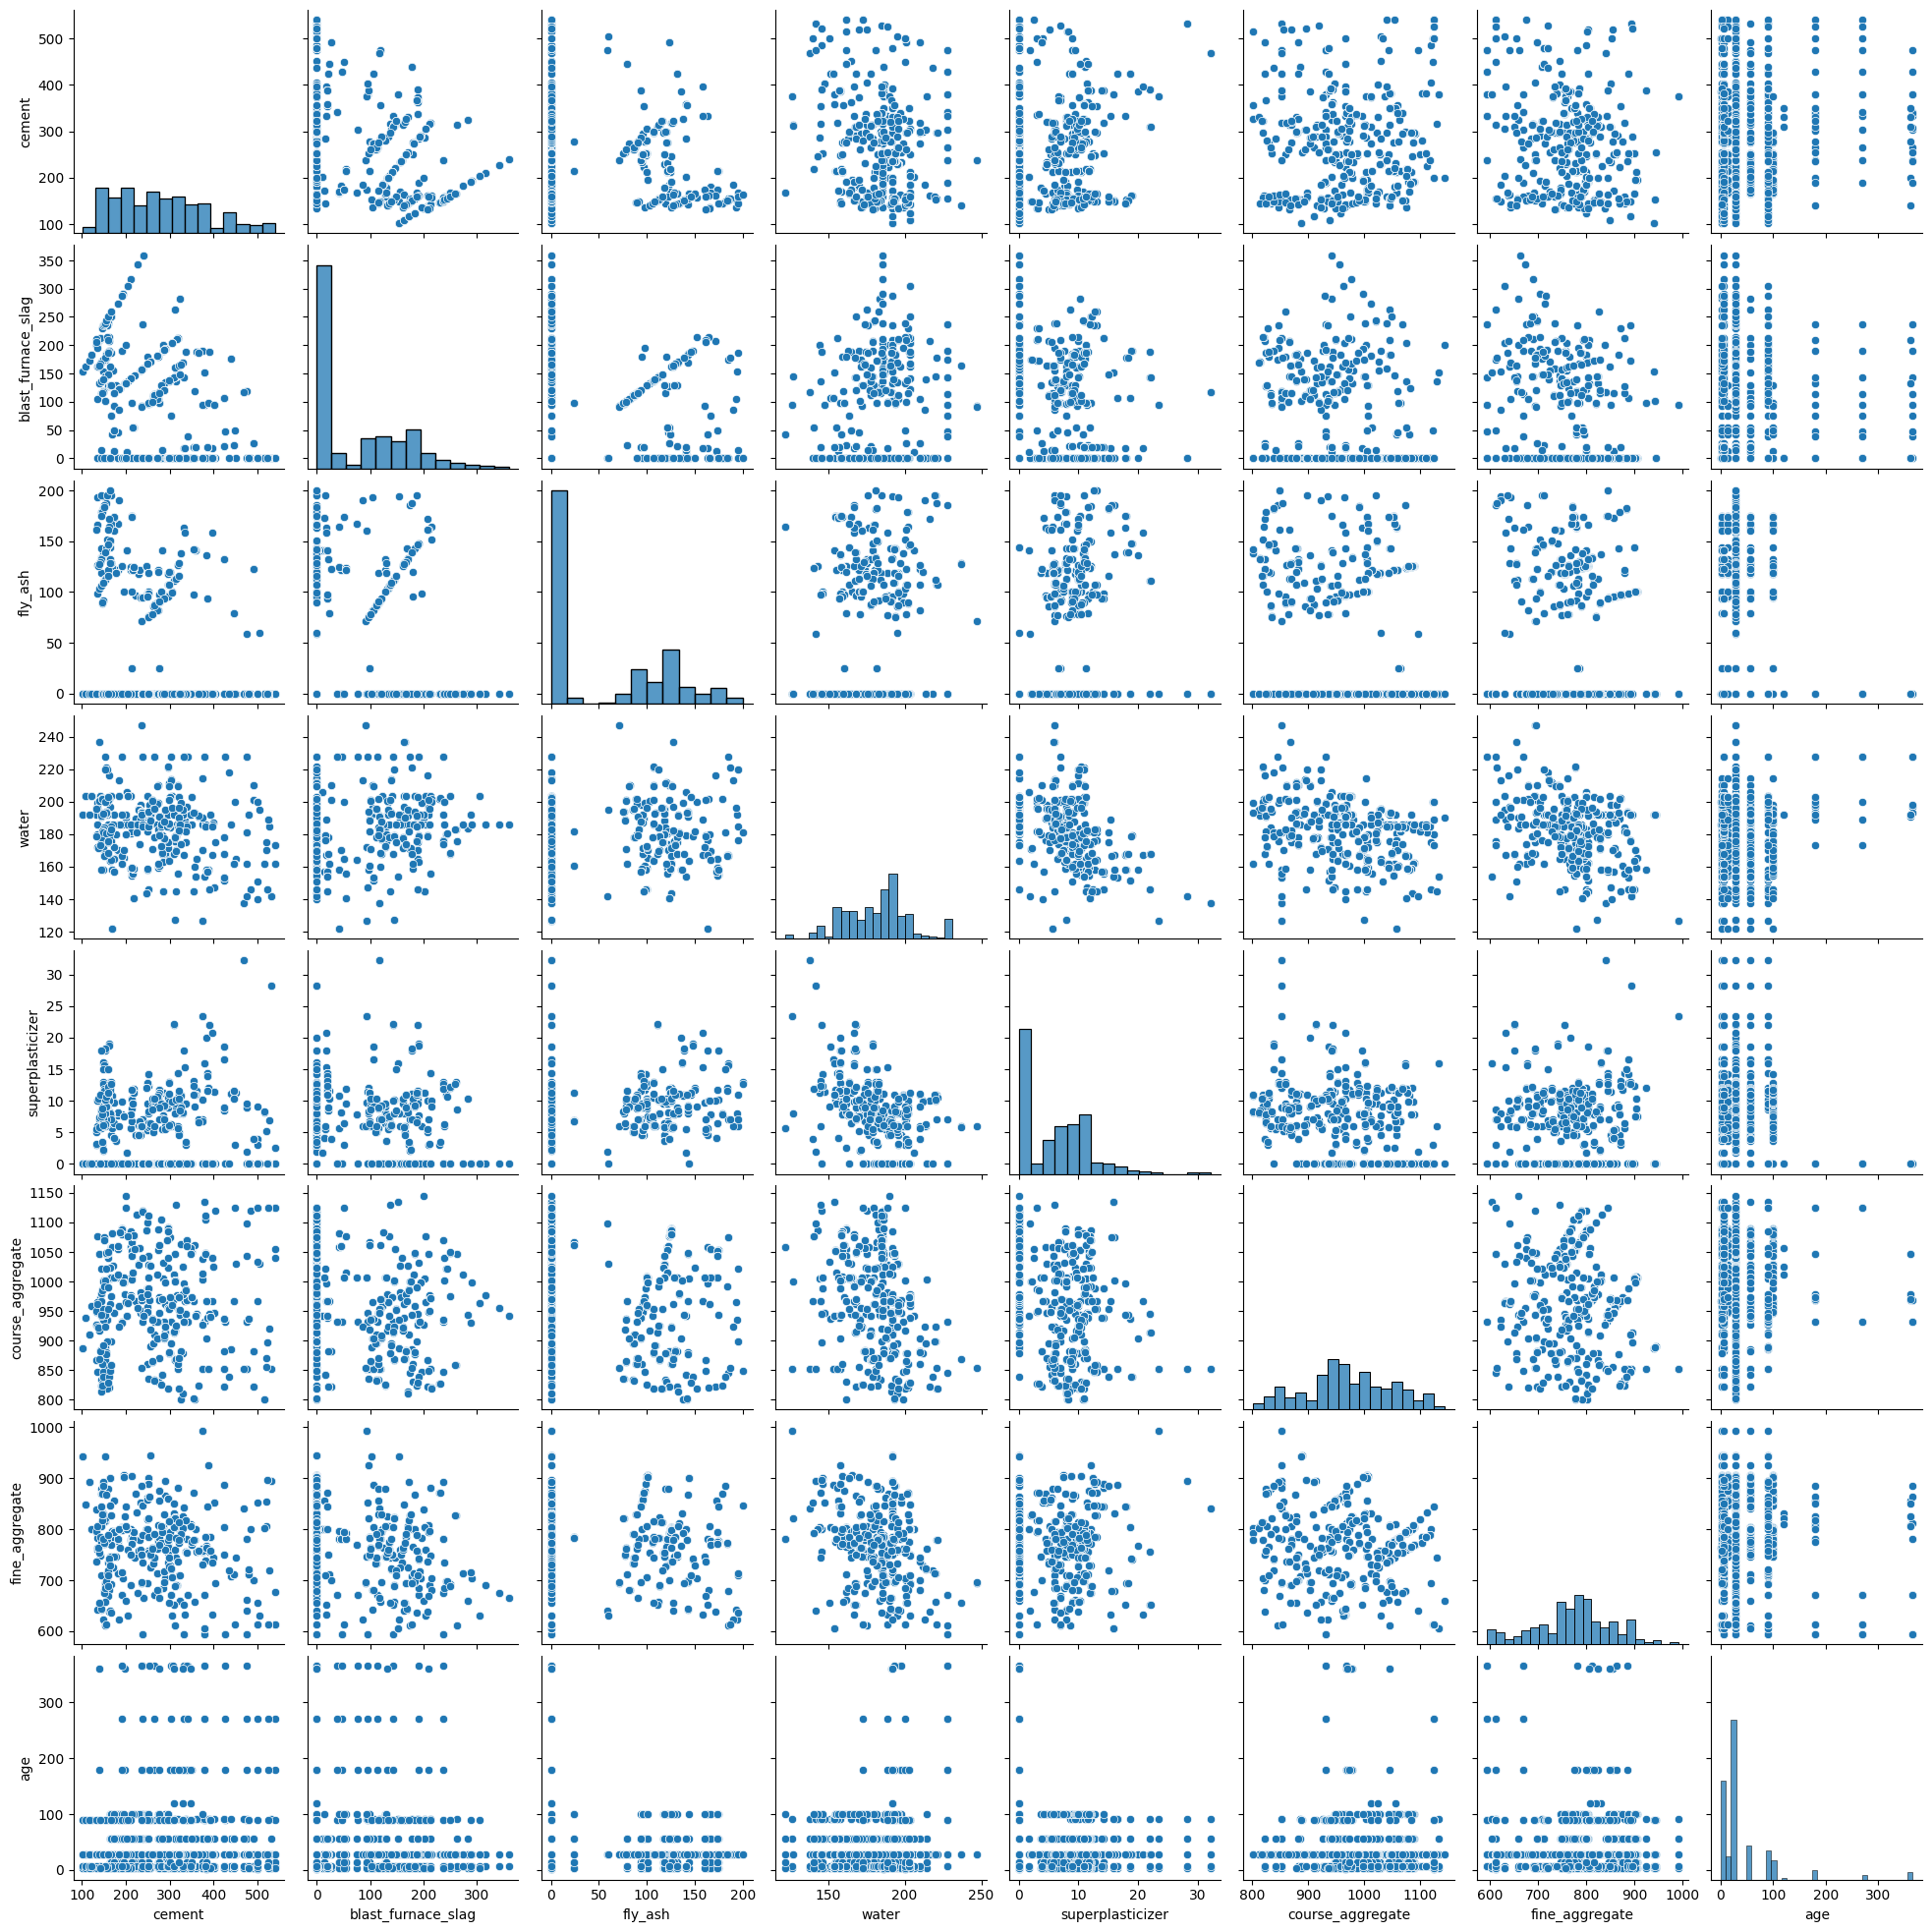

In [15]:
sns.pairplot(X)

As we can see by looking at the pairplot, there are no obvious correlations between any of the data. what does stand out is some patterns visible in some of those graphs, like comparing cement to blast_furnace_slag. There are many more instances of non obvious patterns that sooms ot be happening at random in this data.

# Splitting the Data into Train/Test

In [16]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=.2,random_state=0)

# Building the Pipelines

In [18]:
col_trans = ctrans(transformers=[('num',mmscal(),X.columns)], remainder='passthrough')

In [19]:
pipelineLR = plne([('transform',col_trans),('mlr_model',linreg())])

In [23]:
pipelineSVR = plne([('transform',col_trans),('SVR',SVR(kernel='linear'))])

# Executing the Models

In [24]:
pipelineLR.fit(X_train,y_train)
pipelineSVR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'course_aggregate', 'fine_aggregate', 'age'],
      dtype='object'))])),
                ('SVR', SVR(kernel='linear'))])

In [45]:
param_grid = [ {'verbose':[True]}]

In [46]:
search = GridSearchCV(pipelineLR,param_grid)

In [47]:
search.fit(X_train,y_train)

[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s
[Pipeline] ......... (step 1 of 2) Processing transform, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing mlr_model, total=   0.0s


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'course_aggregate', 'fine_aggregate', 'age'],
      dtype='object'))])),
                                       ('mlr_model', LinearRegression())]),
             param_grid=[{'verbose': [True]}])

# Evaluating the Models

In [49]:
y_pred_LR = pipelineLR.predict(X_test)
y_pred_SVR = pipelineSVR.predict(X_test)
y_pred_search = search.predict(X_test)

y_pred_LR_train = pipelineLR.predict(X_train)
y_pred_SVR_train = pipelineSVR.predict(X_train)
y_pred_search_train = search.predict(X_train)

In [53]:
from math import sqrt
print(sqrt(mean_squared_error(y_train,y_pred_LR_train)))
print(sqrt(mean_squared_error(y_test,y_pred_LR)))

10.503906130007064
9.778403438491363


These values indicate a somewhat large discrepancy in the Mean Squared errors of these two models, indicating that the Linear Regression model might be inconsistent.

In [54]:
print(sqrt(mean_squared_error(y_train,y_pred_SVR_train)))
print(sqrt(mean_squared_error(y_test,y_pred_SVR)))

11.47900815226299
10.560951123518214


These values have a similar variation between eachother to the Linear Regression model, indicating that the Support Vector Regression model would also be about as inconsistent as the Linear Regression model.

In [55]:
print(sqrt(mean_squared_error(y_train,y_pred_search_train)))
print(sqrt(mean_squared_error(y_test,y_pred_search)))

10.503906130007064
9.778403438491363


The values for the Grid Search model are roughtly the same distance apart as the other models, indicating a similar judgement of consistency amongst all three models.

# Conclusion

In conclusion, these models might be somewhat inconsistent for their assesment of the values of compressive strength amongs concrete, but overall, they share the same inconsistency, and between all models, there is not one that should be favored over the others.